In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import os
import hvplot.pandas

### 1. Gas Station Brands per Zip Code
Exploring to see if gas station brands have any trends per zip code

In [2]:
extra_clean_gas = pd.read_csv("Resources/extra_clean_gas.csv")
extra_clean_gas = extra_clean_gas.drop('Unnamed: 0', axis=1)



In [3]:
 # Extract the 'business' column as a list
 brand_name1 = extra_clean_gas['business'].to_list()

 # Create an empty list to store the modified names
 new_brand_name = []

 # Create a list of words to search for
 brands_to_check = ['76', 'ARCO', 'Chevron', 'Exxon', 'Flyers', 'Valero', 'Mobil', 'Qwik Korner', 'Shell', 'Sinclair', 'Speedway', 'United', 'Vons Fuel Station']

 # Iterate over the list of names
 for bname in brand_name1:
     # Check if the name contains any of the words to search for
     if any(brand in bname for brand in brands_to_check):
         # Rename the name to just the word
         new_name = [brand for brand in brands_to_check if brand in bname][0]
     else:
         new_name = bname

     # Add the new name to the list
     new_brand_name.append(new_name)

 print(new_brand_name)
 extra_clean_gas['Brand Name'] = new_brand_name


['Shell', 'Shell', 'Valero', 'Chevron', 'Valero', 'ARCO', 'Shell', 'Speedway', 'Shell', 'Chevron', 'Speedway', 'Chevron', 'Shell', 'Mobil', 'Exxon', 'Chevron', 'Chevron', 'Chevron', 'Shell', 'Chevron', 'Hazard Center Auto Mart', 'Shell', 'Chevron', 'Shell', 'Shell', '76', 'Chevron', '76', 'ARCO', 'Chevron', 'Chevron', 'Vons Fuel Station', 'Shell', 'Shell', 'Shell', 'Ultra Gas', 'Mobil', 'Tierrasanta Gas Station', 'ARCO', 'ARCO', 'Fast Fuel Car Care Center', 'ARCO', 'ARCO', 'Chevron', 'Shell', '76', 'Valero', 'Mobil', 'Shell', 'J & R Gas and Mini Mart', 'United', 'Chevron', 'ARCO', 'Valero', 'ARCO', '76', 'Petromerica', 'Chevron', 'ARCO', 'Shell', 'Chevron', 'ARCO', 'Speedway', 'Chevron', 'Chevron', 'Shell', 'Bay Park Fuel', '76', 'Shell', 'Chevron', 'Good Point Gasoline', 'Shell', 'ARCO', 'Chevron', 'Chevron', 'Chevron', 'Shell', 'Shell', 'Shell', 'Mobil', 'Shell', 'ARCO', 'Shell', 'Fashion Valley Gas', 'Summit Gasoline', 'Thrifty', '76', 'Shell', 'Chevron', '76', 'Shell', 'Chevron', '

In [4]:
"""# Extract the 'business' column as a list
brand_name1 = extra_clean_gas['business'].to_list()

# Create an empty list to store the modified names
new_brand_name = []


# Create a list of words to search for
brands_to_check = ['76', 'ARCO', 'Chevron', 'Exxon', 'Flyers', 'Valero', 'Mobil', 'Qwik Korner', 'Shell', 'Sinclair', 'Speedway', 'United', 'Vons Fuel Station']

# Iterate over the list of names
for bname in brand_name1:
    # Check if the name contains any of the words to search for
    if any(brand in bname for brand in brands_to_check):
        # Rename the name to just the word
        new_name = [brand for brand in brands_to_check if brand in bname][0]
        new_brand_name.append('brand name')
    else:
        new_name = bname[1]
        new_brand_name.append('mom & pop')

  

#print(new_brand_name)
extra_clean_gas['Brand Name'] = new_brand_name"""

"# Extract the 'business' column as a list\nbrand_name1 = extra_clean_gas['business'].to_list()\n\n# Create an empty list to store the modified names\nnew_brand_name = []\n\n\n# Create a list of words to search for\nbrands_to_check = ['76', 'ARCO', 'Chevron', 'Exxon', 'Flyers', 'Valero', 'Mobil', 'Qwik Korner', 'Shell', 'Sinclair', 'Speedway', 'United', 'Vons Fuel Station']\n\n# Iterate over the list of names\nfor bname in brand_name1:\n    # Check if the name contains any of the words to search for\n    if any(brand in bname for brand in brands_to_check):\n        # Rename the name to just the word\n        new_name = [brand for brand in brands_to_check if brand in bname][0]\n        new_brand_name.append('brand name')\n    else:\n        new_name = bname[1]\n        new_brand_name.append('mom & pop')\n\n  \n\n#print(new_brand_name)\nextra_clean_gas['Brand Name'] = new_brand_name"

In [5]:
new_cols = ['Brand Name', 'business', 'zip code', 'address', 'gas1 currency', 'gas1 type',
       'gas1 price', 'gas1 pricetag', 'gas1 unit', 'gas1 updated',
       'gas2 currency', 'gas2 type', 'gas2 price', 'gas2 pricetag',
       'gas2 unit', 'gas2 updated', 'gas3 currency', 'gas3 type', 'gas3 price',
       'gas3 pricetag', 'gas3 unit', 'gas3 updated']

extra_clean_gas_w_brand = extra_clean_gas[new_cols]


In [6]:
zip_brand = extra_clean_gas_w_brand.loc[:,['zip code','Brand Name']]



In [7]:
counts_per_zip_per_brand = zip_brand.groupby(zip_brand['zip code'])['Brand Name'].value_counts()

counts_per_zip_per_brand_df = pd.DataFrame(counts_per_zip_per_brand)
counts_per_zip_per_brand_df = counts_per_zip_per_brand_df.rename(columns={"Brand Name": "count"})




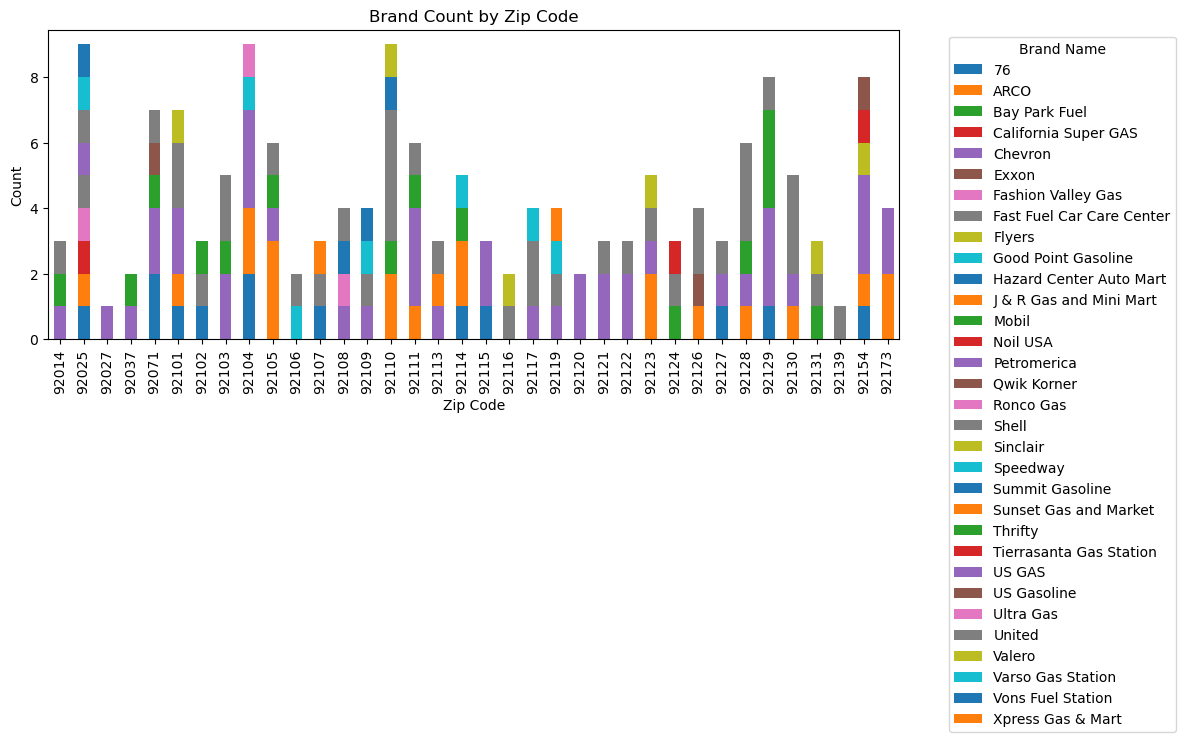

<Figure size 640x480 with 0 Axes>

In [8]:
# Group the data by Zip Code and Brand Name and sum the counts
grouped = counts_per_zip_per_brand_df.groupby(['zip code', 'Brand Name'])['count'].sum().unstack().fillna(0)

# Plot the bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Brand Count by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.legend(title='Brand Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Save the figure
plt.savefig("Fig_output/brandbyzip.png")

In [9]:
zip_brand_price = extra_clean_gas_w_brand.loc[:,['zip code','Brand Name', 'gas1 price']]
group_brand = zip_brand_price.groupby(["Brand Name"])["gas1 price"].mean()
zip_code_group = zip_brand_price.groupby(["zip code"])["gas1 price"].mean()
zip_code_group.head()

zip code
92014    6.193333
92025    5.966667
92027    6.500000
92037    6.330000
92071    6.180000
Name: gas1 price, dtype: float64

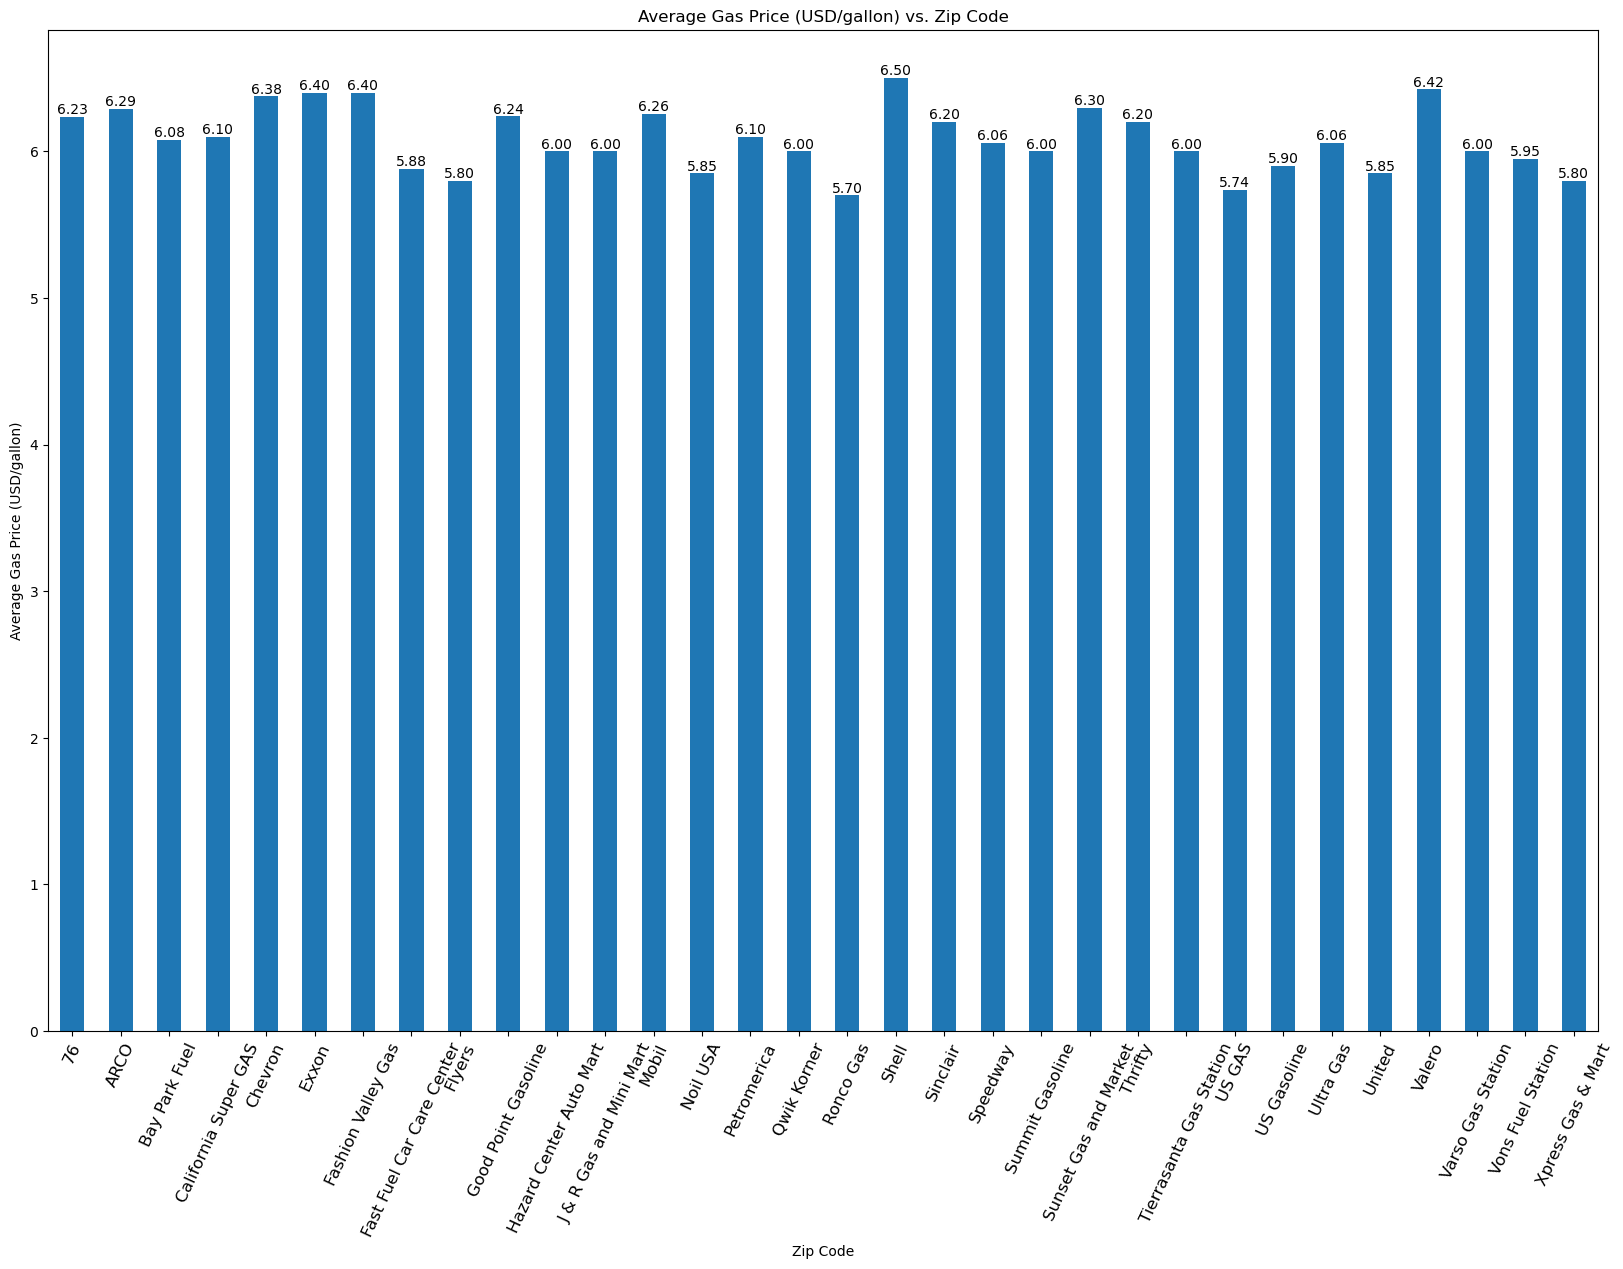

<Figure size 640x480 with 0 Axes>

In [10]:
ax = group_brand.plot(x= "Brandname", y= "gas1 price", rot = 65, kind= "bar", width=.5, figsize=(20,13))
bar_name = ax
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12) 
plt.xlabel("Zip Code")
#https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
ax.bar_label(ax.containers[0],fmt='%.2f')
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Zip Code")
plt.show()

#Save the figure
plt.savefig("Fig_output/avggasbyzip.png")

### 2. Correlation between gas type (reg, mid, super) and Zip Code
Exploring to see if the Zip Code changes the difference between the gas prices.

In [11]:
gas_data_df = pd.read_csv("Resources/Zip Code Data All.csv")
gas_data_df.head()

,Unnamed: 0,zip code,lat,lng,city,population,density,Regular avg,Midgrade avg,Premium avg,Household Income Median
0,0,92014,32.96797,-117.24879,Del Mar,12823.0,785.2,6.193333,6.393333,6.586667,155531
1,1,92025,33.08492,-117.02967,Escondido,50831.0,877.2,5.966667,6.178889,6.327778,58273
2,2,92027,33.13263,-116.98335,Escondido,56878.0,368.0,6.500000,6.700000,6.800000,65989
3,3,92037,32.85257,-117.25104,La Jolla,37505.0,1202.1,6.330000,6.550000,6.680000,109194
4,4,92071,32.85045,-116.99479,Santee,59826.0,1225.5,6.180000,6.402857,6.624286,87334


In [12]:
def linear_regression(x_values,y_values, clr):
    corr = round(st.pearsonr(x_values,y_values)[0],2)
    print(f"The r-squared is : {corr}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str("{:.2e}".format(slope)) + "x + " + str(round(intercept,2))
    #plt.scatter(x_values,y_values, color = clr)
    plt.plot(x_values,regress_values,color = clr)
    
    return line_eq

The r-squared is : 0.17
The r-squared is : 0.19
The r-squared is : 0.2


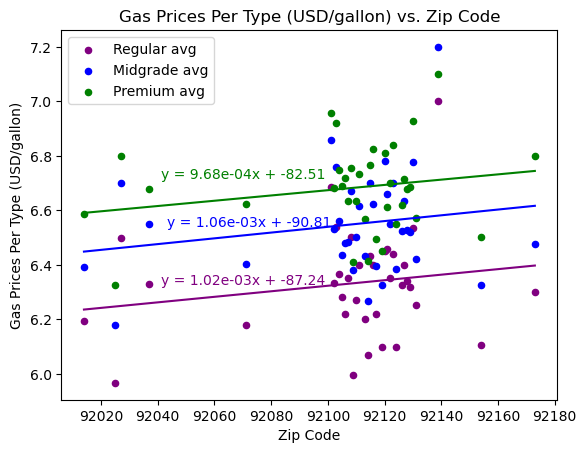

<Figure size 640x480 with 0 Axes>

In [13]:
ax = gas_data_df.plot(x = "zip code", y = "Regular avg", kind= "scatter", label = "Regular avg", color = "purple")
gas_data_df.plot(x = "zip code", y = "Midgrade avg", kind= "scatter", label = "Midgrade avg", color = "blue", ax = ax)
gas_data_df.plot(x = "zip code", y = "Premium avg", kind= "scatter", label = "Premium avg", color = "green", ax = ax)

regular = linear_regression(gas_data_df["zip code"],gas_data_df["Regular avg"], "purple")
midgrade = linear_regression(gas_data_df["zip code"],gas_data_df["Midgrade avg"], "blue")
premium = linear_regression(gas_data_df["zip code"],gas_data_df["Premium avg"], "green")

plt.figtext(0.28,0.35, regular,fontsize=10,color="purple")
plt.figtext(0.29,0.47, midgrade,fontsize=10,color="blue")
plt.figtext(0.28,0.57, premium,fontsize=10,color="green")
plt.xlabel("Zip Code")
plt.ylabel("Gas Prices Per Type (USD/gallon)")
plt.title("Gas Prices Per Type (USD/gallon) vs. Zip Code")
plt.show()

#Save the figure
plt.savefig("Fig_output/gastypebyzip.png")

In [14]:
gas_sorted_by_income = gas_data_df.sort_values(by= "Household Income Median", ascending= True)
gas_sorted_by_income = gas_sorted_by_income.reset_index(drop=True)
gas_sorted_by_income.head()

,Unnamed: 0,zip code,lat,lng,city,population,density,Regular avg,Midgrade avg,Premium avg,Household Income Median
0,16,92113,32.69591,-117.12012,San Diego,51461.0,4405.1,6.200000,6.433333,6.566667,40310
1,9,92105,32.73756,-117.09193,San Diego,73085.0,4902.8,6.283333,6.435000,6.688333,43282
2,35,92173,32.55552,-117.05114,San Ysidro,29634.0,3976.4,6.300000,6.475000,6.800000,46549
3,18,92115,32.76154,-117.07187,San Diego,61450.0,3845.7,6.433333,6.700000,6.766667,51636
4,6,92102,32.71595,-117.11749,San Diego,40083.0,3446.3,6.333333,6.533333,6.683333,51744


The r-squared is : 0.03
The r-squared is : 0.04
The r-squared is : 0.01


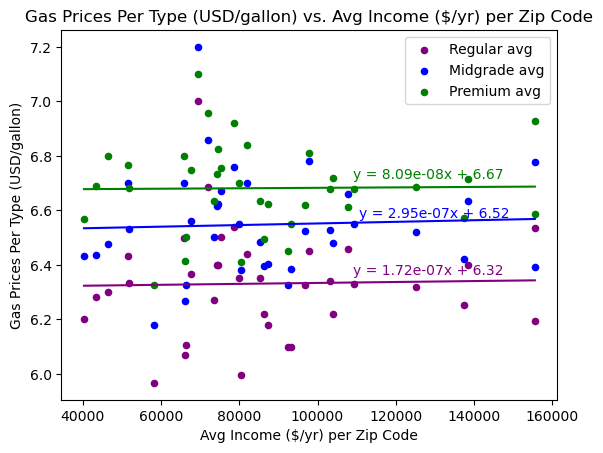

<Figure size 640x480 with 0 Axes>

In [15]:
ax = gas_sorted_by_income.plot(x = "Household Income Median", y = "Regular avg", kind= "scatter", label = "Regular avg", color = "purple")
gas_sorted_by_income.plot(x = "Household Income Median", y = "Midgrade avg", kind= "scatter", label = "Midgrade avg", color = "blue", ax = ax)
gas_sorted_by_income.plot(x = "Household Income Median", y = "Premium avg", kind= "scatter", label = "Premium avg", color = "green", ax = ax)

regular = linear_regression(gas_sorted_by_income["Household Income Median"],gas_sorted_by_income["Regular avg"], "purple")
midgrade = linear_regression(gas_sorted_by_income["Household Income Median"],gas_sorted_by_income["Midgrade avg"], "blue")
premium = linear_regression(gas_sorted_by_income["Household Income Median"],gas_sorted_by_income["Premium avg"], "green")

plt.figtext(0.58,0.37, regular,fontsize=10,color="purple")
plt.figtext(0.59,0.49, midgrade,fontsize=10,color="blue")
plt.figtext(0.58,0.57, premium,fontsize=10,color="green")
plt.xlabel("Avg Income ($/yr) per Zip Code")
plt.ylabel("Gas Prices Per Type (USD/gallon)")
plt.title("Gas Prices Per Type (USD/gallon) vs. Avg Income ($/yr) per Zip Code")
plt.show()

#Save the figure
plt.savefig("Fig_output/gastypevsincomezip.png")

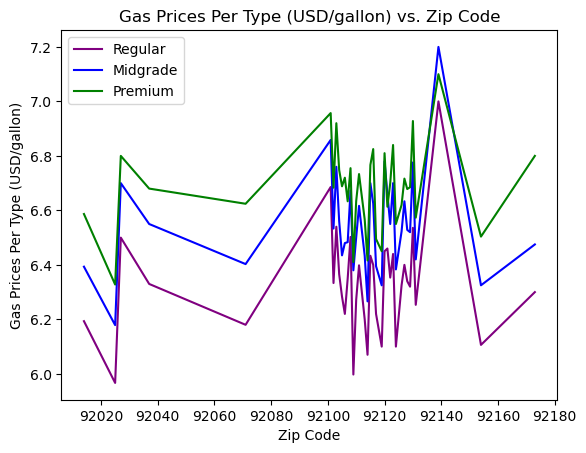

<Figure size 640x480 with 0 Axes>

In [16]:
gas_data_df.plot(x= "zip code", y= ["Regular avg", "Midgrade avg", "Premium avg"] , kind= "line", 
                 color= ["purple", "blue", "green"],label = ["Regular", "Midgrade", "Premium"])
plt.xlabel("Zip Code")
plt.ylabel("Gas Prices Per Type (USD/gallon)")
plt.title("Gas Prices Per Type (USD/gallon) vs. Zip Code")
plt.show()

#Save the figure
plt.savefig("Fig_output/gaspricevszip.png")

### 3. Density vs Regular Average Gas Price

In [17]:
gas_data_density_df = gas_data_df.sort_values('density')
gas_data_density_df.head()

,Unnamed: 0,zip code,lat,lng,city,population,density,Regular avg,Midgrade avg,Premium avg,Household Income Median
23,23,92121,32.89730,-117.20231,San Diego,4213.0,129.7,6.460000,6.660000,6.613333,107786
32,32,92131,32.89604,-117.05737,San Diego,36070.0,360.4,6.253333,6.420000,6.573333,137500
2,2,92027,33.13263,-116.98335,Escondido,56878.0,368.0,6.500000,6.700000,6.800000,65989
34,34,92154,32.57800,-116.96621,San Diego,85024.0,639.9,6.106250,6.325000,6.503750,66498
0,0,92014,32.96797,-117.24879,Del Mar,12823.0,785.2,6.193333,6.393333,6.586667,155531


The r-squared is : 0.22


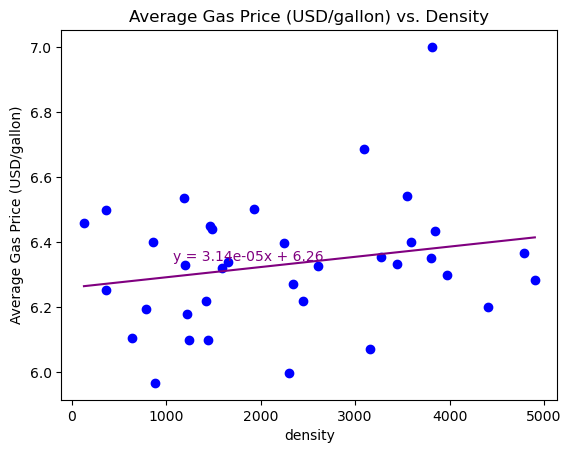

<Figure size 640x480 with 0 Axes>

In [18]:
plt.scatter(gas_data_density_df['density'], gas_data_density_df['Regular avg'], c='blue')
plt.xlabel("density")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Density")
density = linear_regression(gas_data_density_df["density"],gas_data_density_df["Regular avg"], "purple")
plt.figtext(0.3,0.4, density,fontsize=10,color="purple")
plt.show()

#Save the figure
plt.savefig("Fig_output/avggasvsdensity.png")


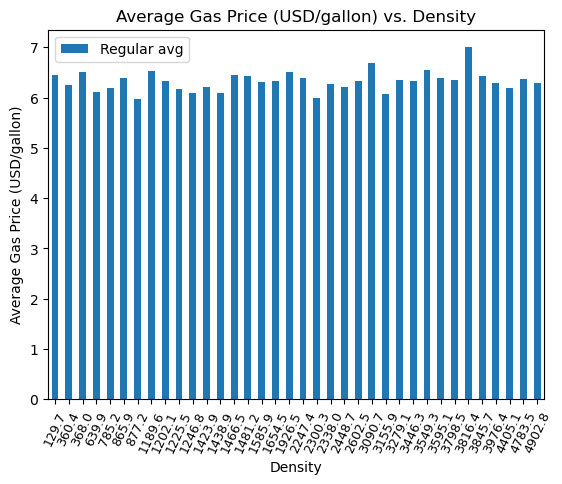

<Figure size 640x480 with 0 Axes>

In [19]:
ax = gas_data_density_df.plot(x= "density", y= "Regular avg", rot=65, kind= "bar", width=.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9) 
plt.xlabel("Density")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Density")
plt.show()

#Save the figure
plt.savefig("Fig_output/avggasvsdensitybar.png")

### 4. Average Gas Price vs. Zip Code

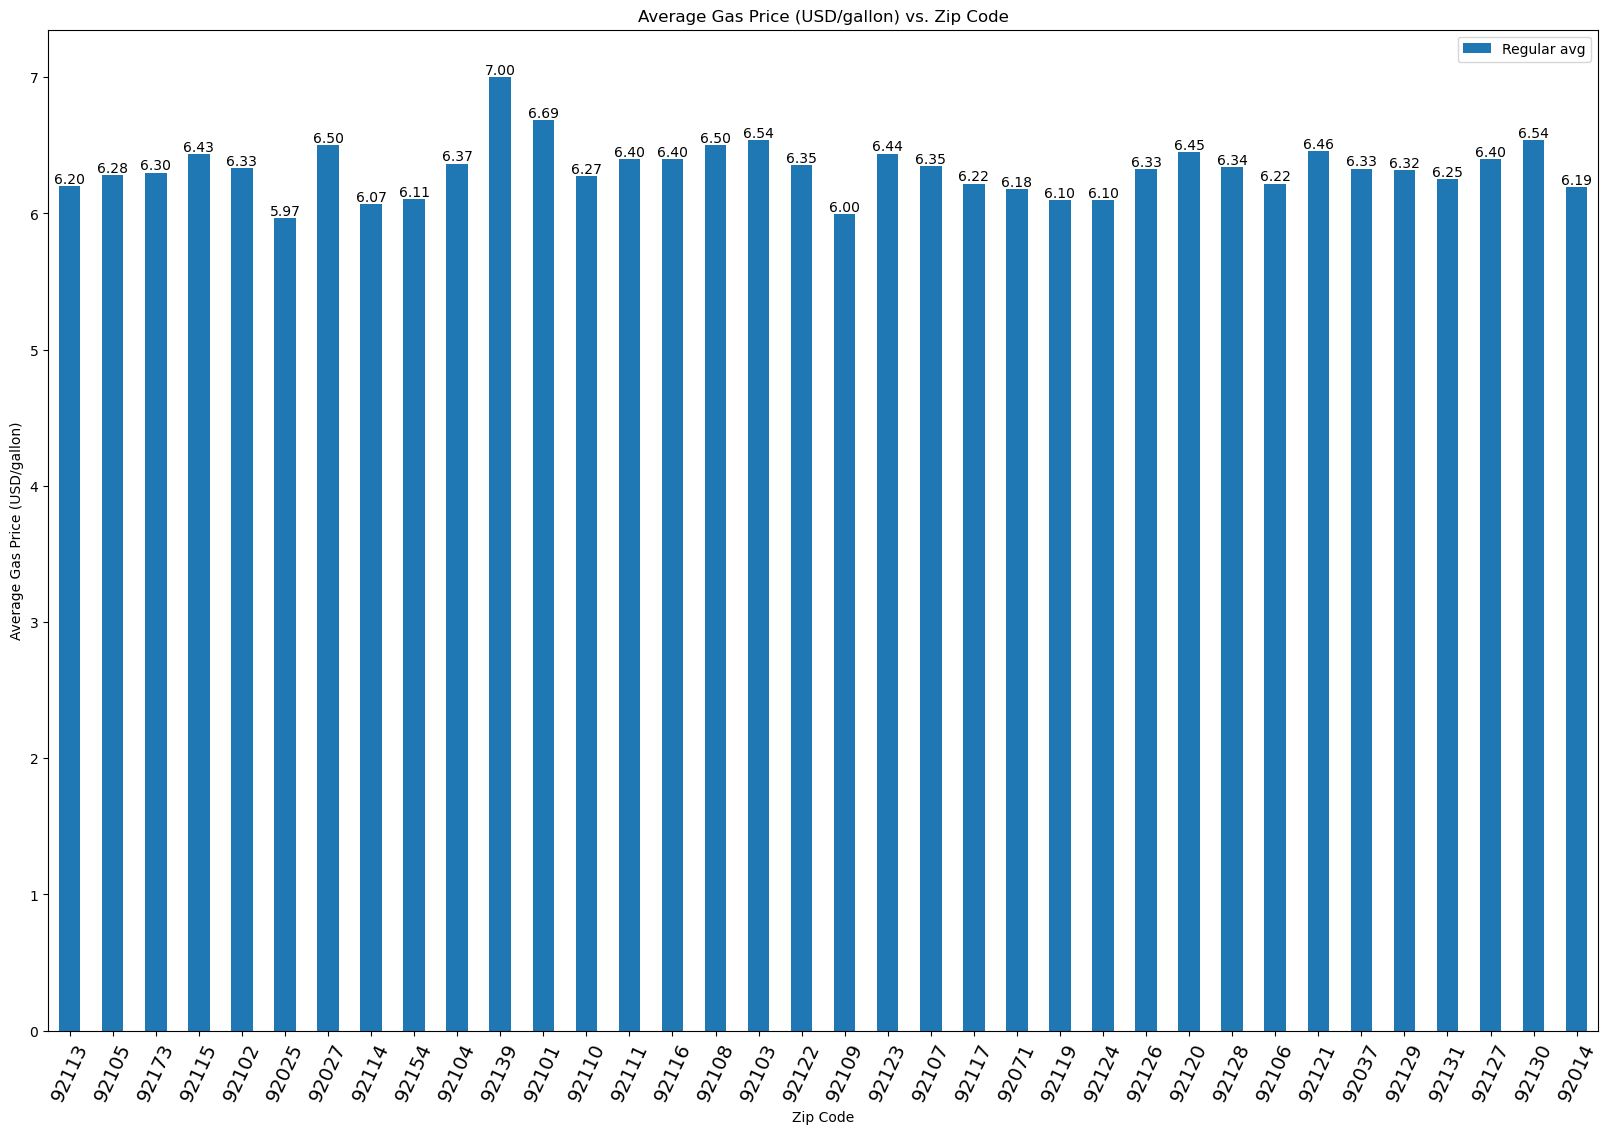

<Figure size 640x480 with 0 Axes>

In [20]:
ax = gas_sorted_by_income.plot(x= "zip code", y= "Regular avg", rot=65, kind= "bar", width=.5, figsize=(20,13))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14) 
#https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
ax.bar_label(ax.containers[0],fmt='%.2f')
plt.xlabel("Zip Code")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Zip Code")
plt.show()

#Save the figure
plt.savefig("Fig_output/avggasvszip.png")

### 5. Average Gas Price vs. Population

The r-squared is : -0.18


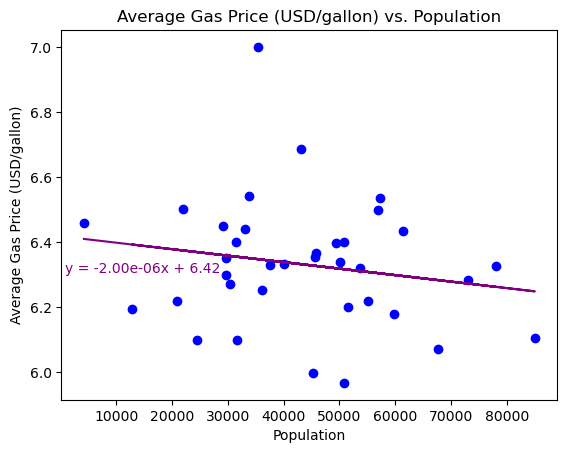

<Figure size 640x480 with 0 Axes>

In [21]:
plt.scatter(gas_data_density_df['population'], gas_data_density_df['Regular avg'], c='blue')
plt.xlabel("Population")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Population")
population = linear_regression(gas_data_density_df["population"],gas_data_density_df["Regular avg"], "purple")
plt.figtext(.13,.375, population,fontsize=10,color="purple")
plt.show()

#Save the figure
plt.savefig("Fig_output/avggasypop.png")

### 6. Average Gas Price vs. Median Household Income 

The r-squared is : 0.03


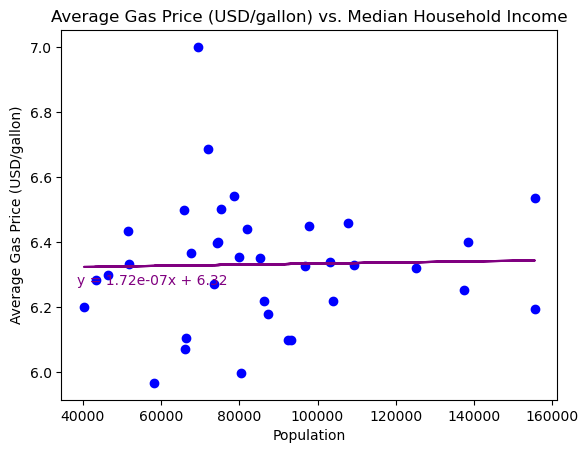

<Figure size 640x480 with 0 Axes>

In [22]:
plt.scatter(gas_data_density_df['Household Income Median'], gas_data_density_df['Regular avg'], c='blue')
plt.xlabel("Population")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Median Household Income")
household_income = linear_regression(gas_data_density_df["Household Income Median"],gas_data_density_df["Regular avg"], "purple")
plt.figtext(.15,.35, household_income,fontsize=10,color="purple")
plt.show()

#Save the figure
plt.savefig("Fig_output/avggasvsincome.png")

In [23]:
gas_data_df.head()

,Unnamed: 0,zip code,lat,lng,city,population,density,Regular avg,Midgrade avg,Premium avg,Household Income Median
0,0,92014,32.96797,-117.24879,Del Mar,12823.0,785.2,6.193333,6.393333,6.586667,155531
1,1,92025,33.08492,-117.02967,Escondido,50831.0,877.2,5.966667,6.178889,6.327778,58273
2,2,92027,33.13263,-116.98335,Escondido,56878.0,368.0,6.500000,6.700000,6.800000,65989
3,3,92037,32.85257,-117.25104,La Jolla,37505.0,1202.1,6.330000,6.550000,6.680000,109194
4,4,92071,32.85045,-116.99479,Santee,59826.0,1225.5,6.180000,6.402857,6.624286,87334


In [24]:
%%capture --no-display

# Configure the map plot
SD_gas_by_zip = gas_data_df.hvplot.points(
    x = "lng",
    y = "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Regular avg",
    scale = 1,
    color = "Household Income Median",
    alpha=0.65,
    hover_cols = ["zip code", "Household Income Median", "Regular avg", "Midgrade avg", "Premium avg" ]
)

# Display the map 
SD_gas_by_zip

#Save the figure
plt.savefig("Fig_output/sdgasmap.png")

<Figure size 640x480 with 0 Axes>